In [3]:
import numpy as np

from student_project.model_testing import testing
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fine-tuned model

In [4]:
model_config = {
        'architecture': 'B_6-Wi_512',
        'net_input_res': 64,
        'checkpoint_path': '/Users/roncaglionidaniele/Documents/CAS/Deep_Learning/scaling_mlps/checkpoints_finetune/res_64_in21k_cifar10_cifar10/epoch_0'
    }
dataset = 'cifar10'
batch_size = 16

model, test_loader = testing.get_test_artifacts(model_config, dataset, batch_size)

RUNNING ON cpu
Load_state overrideoutput <All keys matched successfully>
Files already downloaded and verified


In [5]:
results = testing.test(model, test_loader)
print(results)

Evaluation: 100%|██████████| 625/625 [00:08<00:00, 77.64it/s]

(32.63, 68.51)


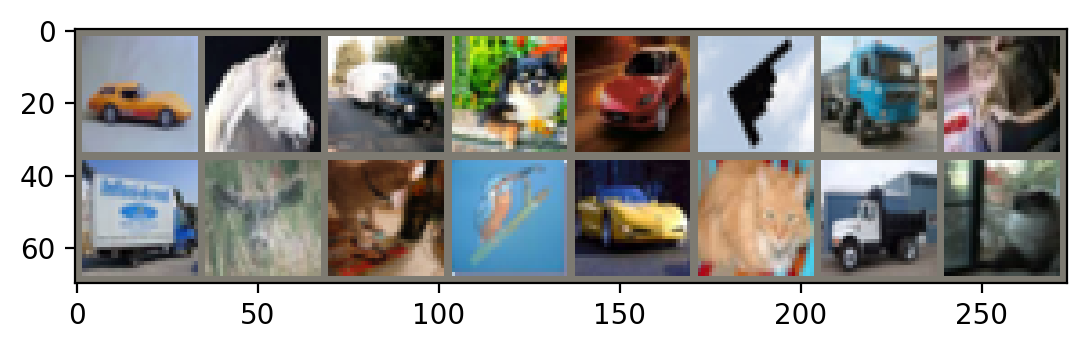

Ground truth:  car   horse truck dog   car   plane truck cat   truck deer  cat   bird  car   cat   truck cat  
Predicted   :  ship  horse truck dog   truck plane truck dog   car   deer  cat   bird  car   cat   truck truck


(tensor([1, 7, 9, 5, 1, 0, 9, 3, 9, 4, 3, 2, 1, 3, 9, 3]),
 tensor([[-7.4318e-01,  5.0109e-01, -3.4468e-01, -2.6871e-01, -8.7750e-02,
          -4.7138e-01, -3.2051e-01, -6.8229e-01,  2.8108e+00, -6.0443e-01],
         [-8.6263e-01, -6.6570e-01,  6.5120e-02,  2.4499e-01, -1.5804e+00,
           1.0028e+00, -2.9324e-01,  1.6579e+00, -8.4963e-01, -4.7902e-01],
         [-7.7946e-01,  1.3537e+00, -4.7223e-01, -3.5887e-02, -1.1053e+00,
          -9.6925e-02, -4.3248e-01, -4.4542e-01, -4.0960e-01,  2.6188e+00],
         [-2.1360e-01, -2.7225e-01,  4.9409e-01,  9.5066e-01, -2.4099e-01,
           1.2806e+00,  1.9912e-01, -6.7905e-01, -4.2243e-01,  2.6109e-01],
         [-8.3274e-01,  1.7003e+00, -5.5295e-01, -1.9184e-01, -4.1201e-01,
          -1.2708e-01, -4.2888e-01, -5.2125e-01, -6.8213e-01,  1.9359e+00],
         [ 2.0361e+00, -8.3230e-01,  4.4805e-01,  7.6629e-01,  9.8897e-02,
          -6.3317e-01, -4.7346e-01, -4.3270e-02, -4.6145e-01, -5.4569e-01],
         [-3.7838e-01, -5.6498e-02,

In [11]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
testing.plot_batch_predictions(model, test_loader,dataset, classes)

# From scratch Trained

In [7]:
model_config = {
        'architecture': 'B_6-Wi_512',
        'net_input_res': 32,
        'checkpoint_path': '/Users/roncaglionidaniele/Documents/CAS/Deep_Learning/scaling_mlps/train_checkpoints/cifar10/epoch_180_compute_382758912000000'
    }
dataset = 'cifar10'
batch_size = 16

model, test_loader = testing.get_test_artifacts(model_config, dataset, batch_size)

RUNNING ON cpu
Load_state overrideoutput <All keys matched successfully>
Files already downloaded and verified


In [8]:
results = testing.test(model, test_loader)
print(results)

Evaluation: 100%|██████████| 625/625 [00:08<00:00, 74.47it/s]

(64.96, 94.86)


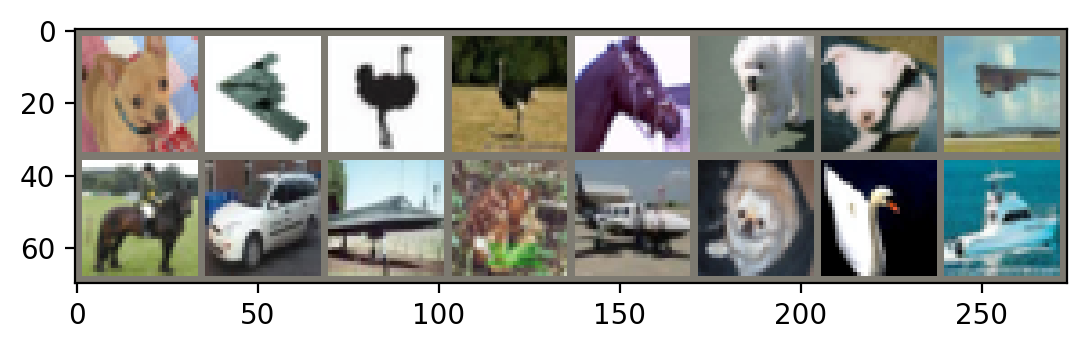

Ground truth:  dog   plane bird  bird  horse dog   dog   plane horse car   plane deer  plane dog   bird  ship 
Predicted   :  dog   plane plane deer  horse dog   plane plane horse car   car   frog  plane cat   dog   ship 


In [13]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
targs, preds = testing.plot_batch_predictions(model, test_loader,dataset, classes)

In [14]:
import torch
import numpy as np

print(np.intersect1d(targs,torch.argmax(preds, dim=1)).shape[0]/targs.shape[0])

0.375
